In [3]:
#Importing libraries 
!pip install umap-learn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import umap
import plotly.graph_objs as go
import plotly.figure_factory as ff

     |████████████████████████████████| 88 kB 3.1 MB/s 
     |████████████████████████████████| 1.1 MB 27.1 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=b519b2de0296af3159a44cdb92f896bac78008c0f935ba59529a61fc52266dce
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=2990287b5f99dc4945517bd0fbd90e07bca4a26485e46c7e9818f7e89d4b36d0
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6f574db3113513696b98f3f9b51f496c
Successfully built umap-learn pynndescent


# Exploratory Data Analysis 



In [6]:
claim = pd.read_csv("Claims.csv")
print(claim.head())
print(claim.shape)
print(claim.info())
print(claim.describe())

# Checking for null values 
claim.isnull().sum()

# Checking the columns
claim.columns

   months_as_customer  age policy_csl  policy_deductible  \
0                 328   48    250/500               1000   
1                 228   42    250/500               2000   
2                 134   29    100/300               2000   
3                 256   41    250/500               2000   
4                 228   44   500/1000               1000   

   policy_annual_premium  umbrella_limit insured_sex insured_education_level  \
0                1406.91               0        MALE                Graduate   
1                1197.22         5000000        MALE                Graduate   
2                1413.14         5000000      FEMALE               Doctorate   
3                1415.74         6000000      FEMALE               Doctorate   
4                1583.91         6000000        MALE           Undergraduate   

  insured_relationship             incident_type  ... incident_severity  \
0              partner  Single Vehicle Collision  ...      Major Damage   
1       

Index(['months_as_customer', 'age', 'policy_csl', 'policy_deductible',
       'policy_annual_premium', 'umbrella_limit', 'insured_sex',
       'insured_education_level', 'insured_relationship', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_hour_of_the_day', 'number_of_vehicles_involved', 'witnesses',
       'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
       'fraud_reported'],
      dtype='object')

# Converting categorical features to numerical features



In [7]:
claim['insured_sex'] = claim['insured_sex'].map({'MALE': 1, 'FEMALE':0})
claim['fraud_reported'] = claim['fraud_reported'].map({'Y': 1, 'N':0})

# Correlation Heatmap

In [8]:
corrs = claim.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
figure.show()

# Dropping columns with high correlation and causation

In [9]:
claim = claim.drop(['months_as_customer','total_claim_amount','vehicle_claim'], axis = 1)
print(claim.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          1000 non-null   int64  
 1   policy_csl                   1000 non-null   object 
 2   policy_deductible            1000 non-null   int64  
 3   policy_annual_premium        1000 non-null   float64
 4   umbrella_limit               1000 non-null   int64  
 5   insured_sex                  1000 non-null   int64  
 6   insured_education_level      1000 non-null   object 
 7   insured_relationship         1000 non-null   object 
 8   incident_type                1000 non-null   object 
 9   collision_type               1000 non-null   object 
 10  incident_severity            1000 non-null   object 
 11  authorities_contacted        1000 non-null   object 
 12  incident_hour_of_the_day     1000 non-null   int64  
 13  number_of_vehicles_

# Selecting Features

In [10]:
categorical_features = ['insured_relationship', 'incident_type', 'collision_type', 'authorities_contacted', 'insured_education_level', 'incident_severity']
newClaim = pd.get_dummies(claim, columns = categorical_features)
print(newClaim.info())
print(newClaim.head(2))

newClaim.head()

newClaim.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 36 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   age                                     1000 non-null   int64  
 1   policy_csl                              1000 non-null   object 
 2   policy_deductible                       1000 non-null   int64  
 3   policy_annual_premium                   1000 non-null   float64
 4   umbrella_limit                          1000 non-null   int64  
 5   insured_sex                             1000 non-null   int64  
 6   incident_hour_of_the_day                1000 non-null   int64  
 7   number_of_vehicles_involved             1000 non-null   int64  
 8   witnesses                               1000 non-null   int64  
 9   injury_claim                            1000 non-null   int64  
 10  property_claim                          1000 non-null   int64

Index(['age', 'policy_csl', 'policy_deductible', 'policy_annual_premium',
       'umbrella_limit', 'insured_sex', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'witnesses', 'injury_claim',
       'property_claim', 'fraud_reported',
       'insured_relationship_not-in-family',
       'insured_relationship_other-relative', 'insured_relationship_own-child',
       'insured_relationship_partner', 'incident_type_Multi-vehicle Collision',
       'incident_type_Parked Car', 'incident_type_Single Vehicle Collision',
       'incident_type_Vehicle Theft', 'collision_type_Front Collision',
       'collision_type_No Collision', 'collision_type_Rear Collision',
       'collision_type_Side Collision', 'authorities_contacted_Ambulance',
       'authorities_contacted_Fire', 'authorities_contacted_None',
       'authorities_contacted_Police', 'insured_education_level_Doctorate',
       'insured_education_level_Graduate',
       'insured_education_level_High School',
       'insured_

# Dividing data into subsets

In [12]:
# Personal Data
subset1 = newClaim[['age','insured_education_level_Graduate', 'insured_education_level_Doctorate', 'insured_education_level_Graduate','insured_education_level_Undergraduate', 'insured_education_level_High School',
                      'insured_relationship_not-in-family','insured_relationship_other-relative', 'insured_relationship_own-child','insured_relationship_partner',
                  'insured_sex']]

In [13]:
# Accident Data
subset2 = newClaim[['incident_severity_Minor Damage', 'incident_severity_Total Loss',
       'incident_severity_Trivial Damage','incident_type_Parked Car', 'incident_type_Single Vehicle Collision',
       'incident_type_Vehicle Theft','collision_type_Front Collision',
       'collision_type_No Collision', 'collision_type_Rear Collision',
       'collision_type_Side Collision','authorities_contacted_Fire', 'authorities_contacted_None',
       'authorities_contacted_Police', 'incident_hour_of_the_day', 'witnesses', 'number_of_vehicles_involved', 'incident_type_Multi-vehicle Collision',
       'incident_type_Parked Car', 'incident_type_Single Vehicle Collision', 'incident_type_Vehicle Theft' ]]

In [16]:
# Claim Data
subset3 = newClaim[['injury_claim', 'property_claim', 'policy_deductible', 'policy_annual_premium', 'umbrella_limit', 'fraud_reported']]


# Normalizing numerical features so that each feature has mean 0 and variance 1

In [17]:
feature_scaler = StandardScaler()
X1 = feature_scaler.fit_transform(subset1)
X2 = feature_scaler.fit_transform(subset2)
X3 = feature_scaler.fit_transform(subset3)

# Analysis on subset1 - Personal Data

In [18]:
# Implementing UMAP to visualize dataset
u = umap.UMAP(n_neighbors=150, min_dist=0.4)
x1_umap = u.fit_transform(X1)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning:

The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.



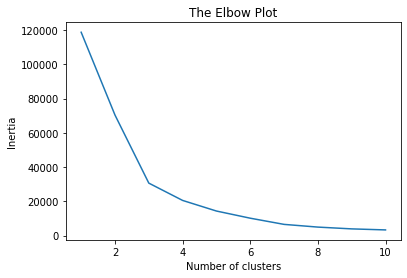

In [19]:
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(x1_umap)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [20]:
# Running KMeans to generate labels
kmeans = KMeans(n_clusters = 3)
kmeans.fit(x1_umap)

age = list(claim['age'])
insured_sex= list(claim['insured_sex'])
insured_education_level= list(claim['insured_education_level'])
insured_relationship = list(claim['insured_relationship'])
fraud_reported=list(claim['fraud_reported'])

data = [go.Scatter(x=x1_umap[:,0], y=x1_umap[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f' age: {a}; insured_sex: {b}; insured_education_level:{c}; insured_relationship:{d}; fraud_reported:{e}' for a,b,c,d,e in list(zip(age,insured_sex, insured_education_level,insured_relationship, fraud_reported))],
                                hoverinfo='text')]

layout = go.Layout(title = 'UMAP Dimensionality Reduction', width = 1000, height = 1000,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
fig.show()

# Analysis on subset2 -  Accident Data

In [21]:
# Implementing UMAP to visualize dataset
u = umap.UMAP(n_neighbors=150, min_dist=0.4)
x2_umap = u.fit_transform(X2)

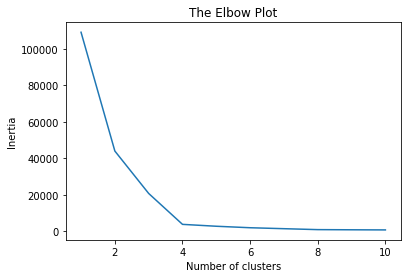

In [22]:
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(x2_umap)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [23]:
# Running KMeans to generate labels
kmeans = KMeans(n_clusters = 4)
kmeans.fit(x2_umap)

incident_type = list(claim['incident_type'])
collision_type= list(claim['collision_type'])
incident_severity = list(claim['incident_severity'])
authorities_contacted= list(claim['authorities_contacted'])
number_of_vehicles_involved =list(claim['number_of_vehicles_involved'])
witnesses =list(claim['witnesses'])
incident_hour_of_the_day =list(claim['incident_hour_of_the_day'])
fraud_reported=list(claim['fraud_reported'])

data = [go.Scatter(x=x2_umap[:,0], y=x2_umap[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f' incident_type: {a}; collision_type: {b}; incident_severity: {c}; authorities_contacted: {d}; number_of_vehicles_involved: {e};witnesses: {f}; incident_hour_of_the_day: {g}; fraud_reported:{h}' for a,b,c,d,e,f,g,h in list(zip(incident_type, collision_type, incident_severity, authorities_contacted, number_of_vehicles_involved, witnesses, incident_hour_of_the_day, fraud_reported))],
                                hoverinfo='text')]

layout = go.Layout(title = 'UMAP Dimensionality Reduction', width = 1000, height = 1000,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
fig.show()

# Analysis on subset3 -  Claim Data

In [24]:
# Analysis on subset2 -  Data
# Implementing UMAP to visualize dataset
u = umap.UMAP(n_neighbors=150, min_dist=0.4)
x3_umap = u.fit_transform(X3)


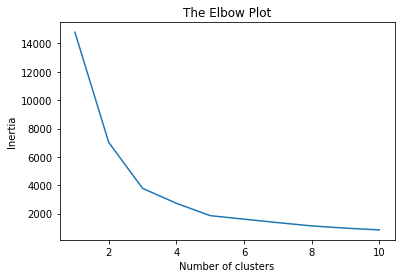

In [25]:
# Finding the number of clusters (K) - Elbow Plot Method
inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 100)
    kmeans.fit(x3_umap)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia)
plt.title('The Elbow Plot')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [26]:
# KMeans to generate labels
kmeans = KMeans(n_clusters = 4)
kmeans.fit(x3_umap)

injury_claim = list(claim['injury_claim'])
property_claim= list(claim['property_claim'])
policy_deductible= list(claim['policy_deductible'])
policy_annual_premium =list(claim['policy_annual_premium'])
umbrella_limit =list(claim['umbrella_limit'])
fraud_reported=list(claim['fraud_reported'])

data = [go.Scatter(x=x3_umap[:,0], y=x3_umap[:,1], mode='markers',
                    marker = dict(color=kmeans.labels_, colorscale='Rainbow', opacity=0.5),
                                text=[f' injury_claim : {a}; property_claim: {b}; policy_deductible:{c}; policy_annual_premium:{d}; umbrella_limit{e}; fraud_reported:{f}' for a,b,c,d,e,f in list(zip(injury_claim,property_claim,policy_deductible,policy_annual_premium,umbrella_limit,fraud_reported))],
                                hoverinfo='text')]

layout = go.Layout(title = 'UMAP Dimensionality Reduction', width = 1000, height = 1000,
                    xaxis = dict(title='First Dimension'),
                    yaxis = dict(title='Second Dimension'))
fig = go.Figure(data=data, layout=layout)
fig.show()